<p style="text-align:center; font-size:32px; font-weight:bold; color:blue;">
    K-Means Clustering: Customer Segmentation
</p>

## Table of Contents

- Business Understanding
- Analytical Approach, Data Requirement/Collection/Understanding
- Data Preparation (Python or SQL)
- Model Development
- Model Evaluation
- Model Deployment

## 1: Business Understanding

The goal is develop a k- means clustering model to effectively carry out customer segmentation. Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retain those customers. Another group might include customers from non-profit organizations and so on.

## Step 2: Analytical Approach, Data Requirement/Collection/Understanding

 #### 2.1. Analytical Approach: 
 K means algorithm will be used since we are working with numerical data. KMeans uses mathematical measures (distance) to cluster continuous data. The lesser the distance, the more similar our data points are. Centroids are updated by Means. But for categorical data points, we cannot calculate the distance 

 #### 2.2. Data Requirements: 
 Requires a reliable source of customer data with various numerical inputs  
 #### 2.3. Data Collection: 
 Data will be collected from an online repository for the case of this exercise.
 #### 2.4. Data Attributes:
  | **Variable**             | **Description**                                           |
|--------------------------|-----------------------------------------------------------|
| **Customer Id**          | Customer reference                                        |
| **Age**                  | Age of customers                                          |
| **Edu**                  | Education background                                      |
| **Income**               | Income Range                                              |
| **Card Debt**            | Credit card debt ratio                                    |
| **Other Debt**           | Other debt ratio                                          |
| **Default**              | Did customer default on debt                              |
| **Address**              | Customer Address                                          |
| **DebtIncomeRatio**      | Ratio of debt to income for customer                      |

#### 2.4. Data Understanding (Descriptive statistics/data visualization)

In [10]:
# Read the dataset
import pandas as pd  
pd.set_option('display.max_columns', None) 
df_customers = pd.read_csv('Cust_Segmentation.csv') 
df_customers

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


In [11]:
df_customers.dtypes

# as can see, all columns are integers and floats - no conversion needed for k-means model

Customer Id          int64
Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
Address             object
DebtIncomeRatio    float64
dtype: object

In [12]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [13]:
df_customers.shape
# data consists of 850 rows and 10 columns

(850, 10)

In [14]:
df_customers.describe()
# highest std in income and age
# mean income is 46.67, average years employed in study is 9 years and average age is 35 years 
# There are people in study that havent worked (min value = 0)
# the minimum age in study is 20 years
# minimum income is 13
# maximum age in study is 56 and years employed is 33 and income 446

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


## 3: Exploratory Data Analysis (EDA)

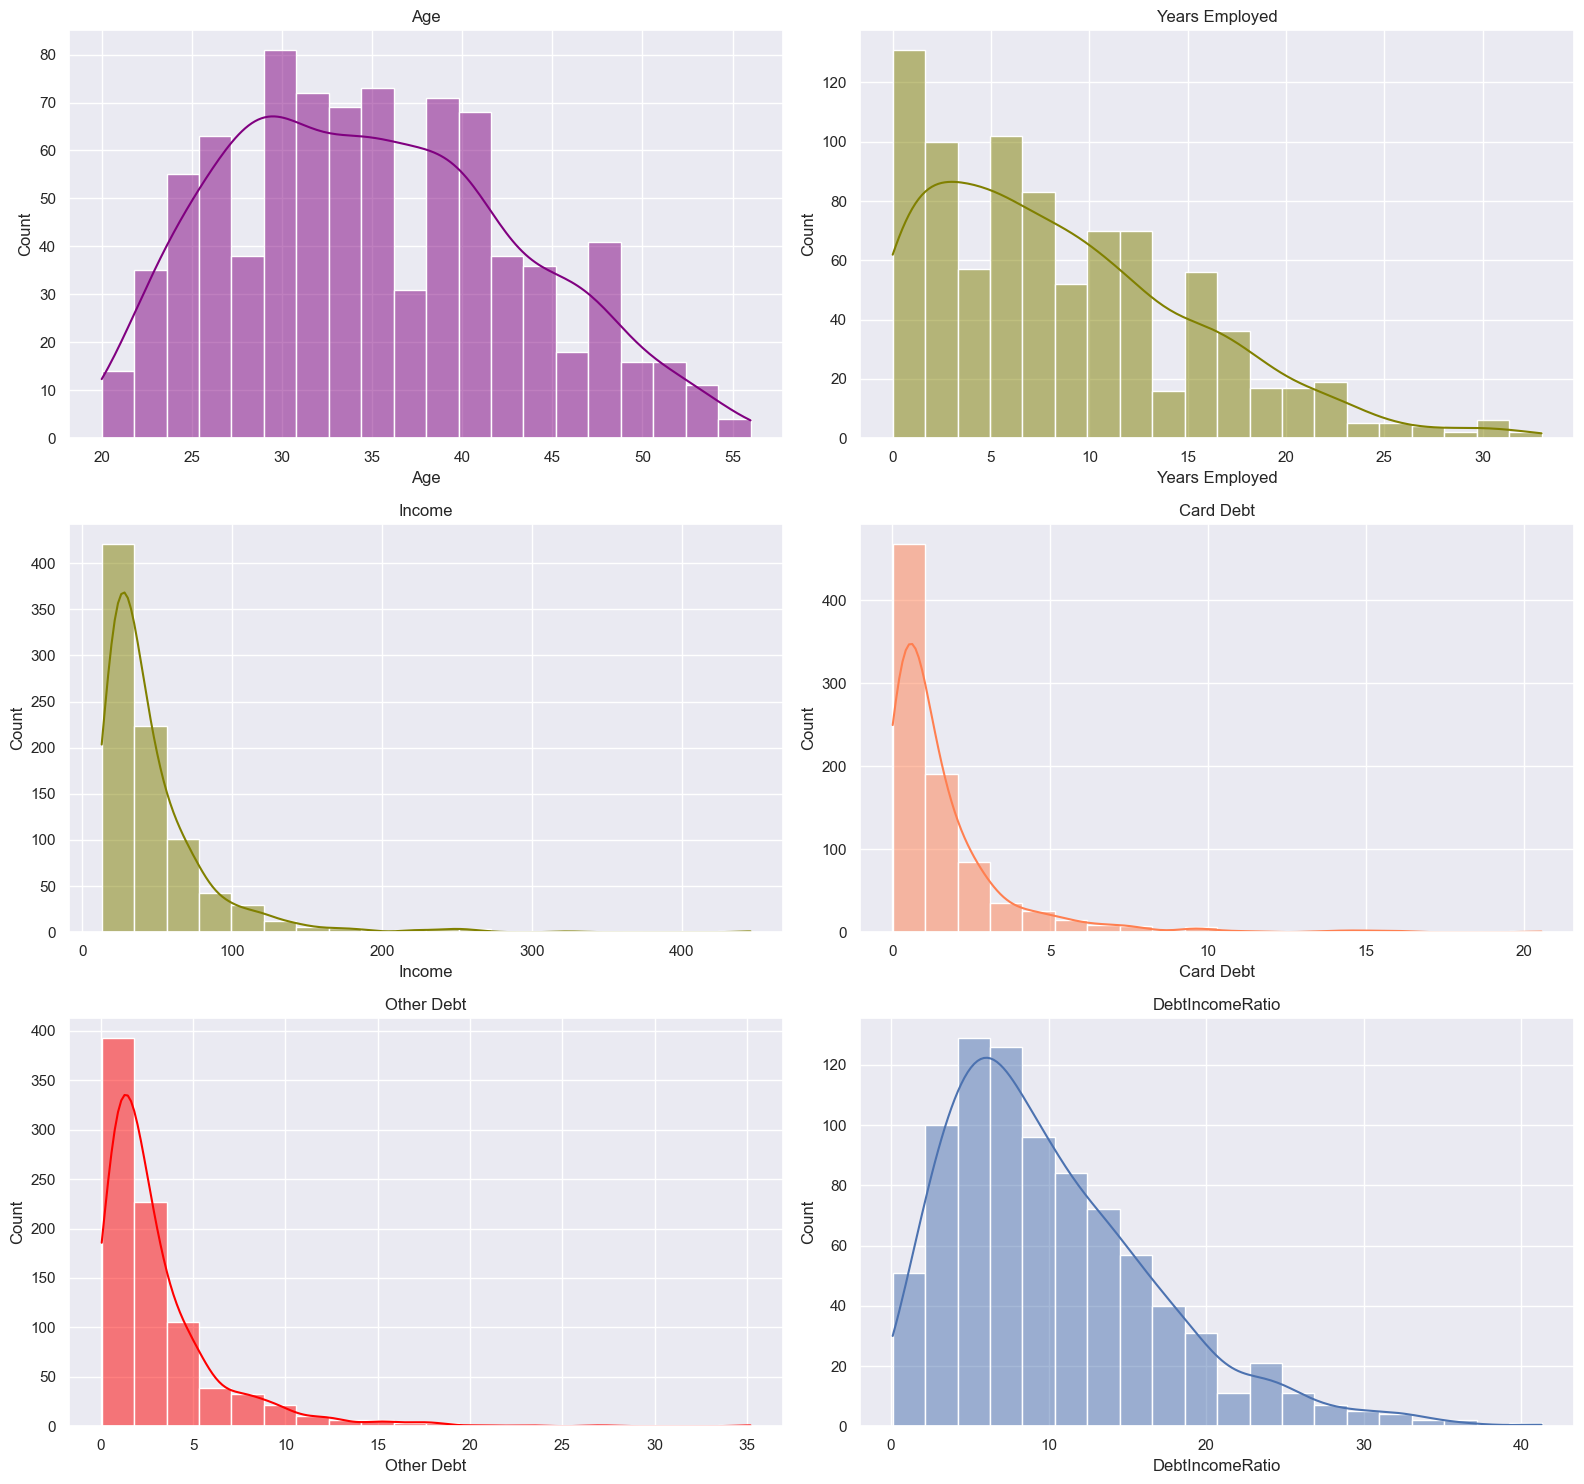

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

#plot histograms
# Set seaborn plotting aesthetics as default
sns.set()

# Define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(16, 15))

# Create histograms in each subplot
sns.histplot(data=df_customers, x='Age', bins=20, kde=True, ax=axes[0, 0],color='purple')
axes[0, 0].set_title('Age')

sns.histplot(data=df_customers, x='Years Employed', bins=20, kde=True, ax=axes[0, 1],color='olive')
axes[0, 1].set_title('Years Employed')

sns.histplot(data=df_customers, x='Income', bins=20, kde=True, ax=axes[1, 0],color='olive')
axes[1, 0].set_title('Income')

sns.histplot(data=df_customers, x='Card Debt', bins=20, kde=True, ax=axes[1, 1],color='coral')
axes[1, 1].set_title('Card Debt')

sns.histplot(data=df_customers, x='Other Debt', bins=20, kde=True, ax=axes[2, 0],color='red')
axes[2, 0].set_title('Other Debt')

sns.histplot(data=df_customers, x='DebtIncomeRatio', bins=20, kde=True, ax=axes[2, 1])
axes[2, 1].set_title('DebtIncomeRatio')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# as can be seen most of the features follow a non-normal distribution
# card debt, other debt and income follow a left skewed distribution


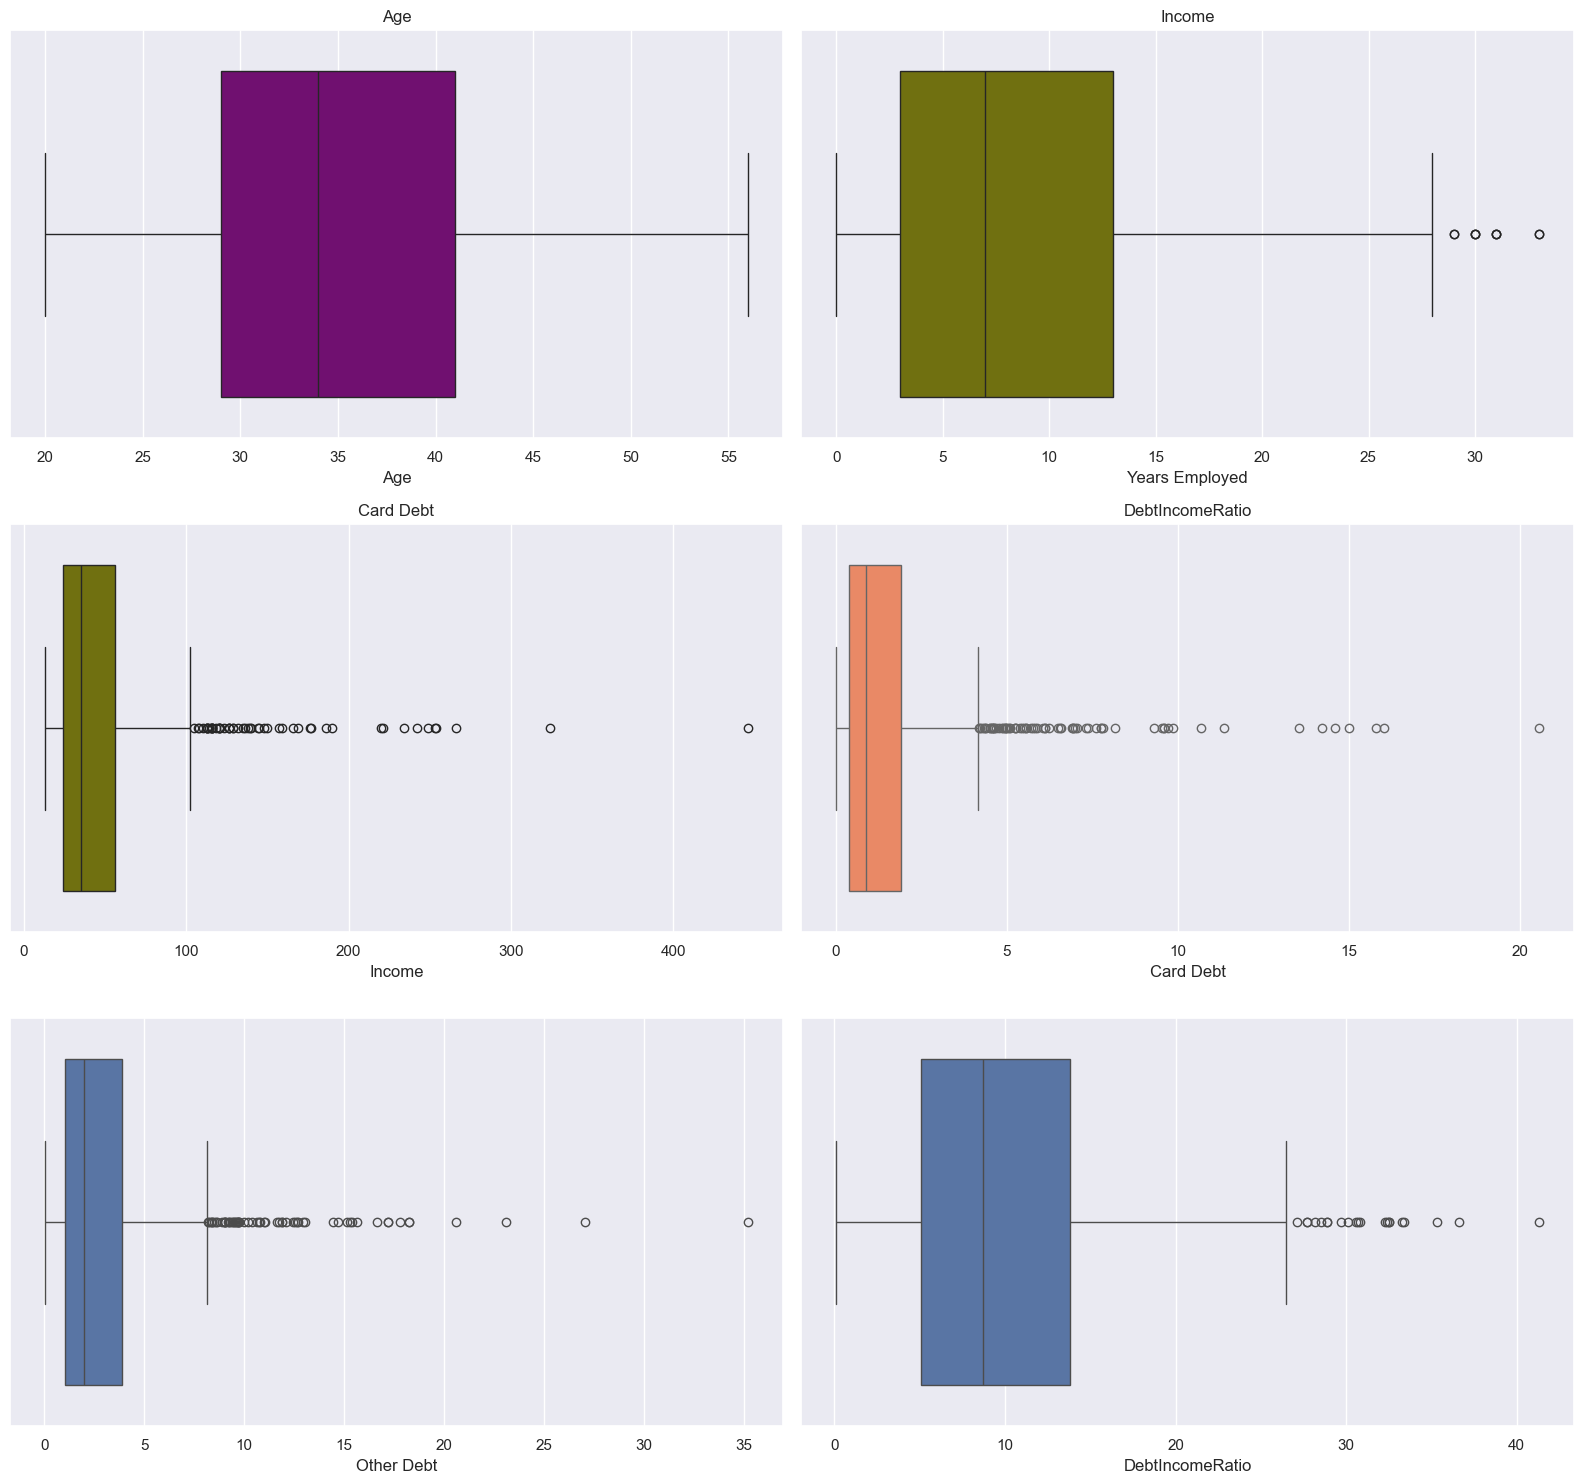

In [17]:
# plot box plots
sns.set()

# Define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(16, 15))

# Create histograms in each subplot
sns.boxplot(data=df_customers, x='Age', ax=axes[0, 0],color='purple')
axes[0, 0].set_title('Age')

sns.boxplot(data=df_customers, x='Years Employed',ax=axes[0, 1],color='olive')
axes[0, 1].set_title('Years Employed')

sns.boxplot(data=df_customers, x='Income', ax=axes[1, 0],color='olive')
axes[0, 1].set_title('Income')

sns.boxplot(data=df_customers, x='Card Debt',ax=axes[1, 1],color='coral')
axes[1, 0].set_title('Card Debt')

sns.boxplot(data=df_customers, x='Other Debt',ax=axes[2, 0])
axes[1, 1].set_title('Other Debt')

sns.boxplot(data=df_customers, x='DebtIncomeRatio',ax=axes[2, 1])
axes[1, 1].set_title('DebtIncomeRatio')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Age has no outliers
# least variation in other debt, card debt and income


## 4: Data Imputation and Cleaning

In [19]:
# identify nulls values
nulls = df_customers.isnull().sum()
print(nulls)

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64


In [20]:
# remove null values
df_customers.dropna(inplace=True)

In [21]:
# feature scaling
from sklearn.preprocessing import StandardScaler

features = ['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'Defaulted','DebtIncomeRatio']

# Initialize the scaler
scaler = StandardScaler() 

# Fit the scaler on the dataset
df_customers_scaled = scaler.fit_transform(df_customers[features])
df_customers_scaled

array([[ 0.76830405,  0.29879269, -0.35900652, ..., -0.60428433,
        -0.59494973, -0.58052847],
       [ 1.51908977, -0.77932527,  2.64702891, ...,  1.5706204 ,
        -0.59494973,  0.37222169],
       [-0.23274357,  0.29879269,  0.24220057, ...,  0.83520125,
         1.68081427,  1.55949495],
       ...,
       [-1.2337912 ,  2.45502862, -1.26081715, ...,  0.04620852,
         1.68081427,  3.39170678],
       [-0.35787453, -0.77932527,  0.54280411, ..., -0.71904138,
        -0.59494973, -1.07889008],
       [ 2.14474454, -0.77932527,  1.1440112 , ...,  0.17648972,
        -0.59494973, -0.24340149]])

## 5: Model Development

Initialization complete
Iteration 0, inertia 7634.916606691329.
Iteration 1, inertia 5599.999999999998.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 7561.265857037254.
Iteration 1, inertia 5599.999999999998.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 7982.887071987117.
Iteration 1, inertia 5599.999999999998.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 9341.67340780435.
Iteration 1, inertia 5599.999999999998.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 8895.844937464142.
Iteration 1, inertia 5599.999999999998.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 8895.844937464142.
Iteration 1, inertia 5599.999999999998.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 10360.72922565689.
Iteration 1, inertia 5599.99999999999

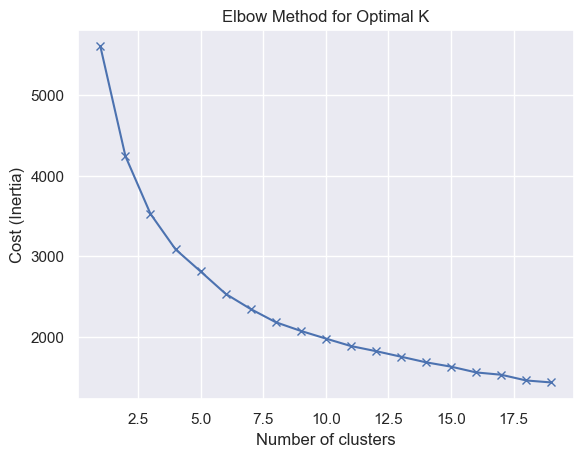

In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

# Screen plot or elbow curve to find the optimal K value
cost = []
K = range(1, 20)  # Max K values to iterate through
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10, random_state=42, verbose=1)
    kmeans.fit(df_customers_scaled)  # Fit the model 
    cost.append(kmeans.inertia_)  # Inertia: Sum of distances to closest cluster center

# Plotting the elbow curve
plt.plot(K, cost, 'x-')
plt.xlabel('Number of clusters')
plt.ylabel('Cost (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.show()


In [24]:
# elbow at 4

kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42, verbose=1)
clusters = kmeans.fit_predict(df_customers_scaled)
clusters

Initialization complete
Iteration 0, inertia 5160.065133375196.
Iteration 1, inertia 4403.855436223304.
Iteration 2, inertia 4357.520272212667.
Iteration 3, inertia 4309.261835799176.
Iteration 4, inertia 4179.587526742488.
Iteration 5, inertia 4051.0564480681746.
Iteration 6, inertia 3926.0621690556236.
Iteration 7, inertia 3835.6355555710775.
Iteration 8, inertia 3758.9917242580677.
Iteration 9, inertia 3746.021327388583.
Iteration 10, inertia 3742.5467550673607.
Iteration 11, inertia 3741.9152194172307.
Iteration 12, inertia 3741.6899782593277.
Iteration 13, inertia 3741.4508552930747.
Converged at iteration 13: strict convergence.
Initialization complete
Iteration 0, inertia 5453.5987362135675.
Iteration 1, inertia 4496.39457875745.
Iteration 2, inertia 4289.016517253182.
Iteration 3, inertia 4088.1177372002985.
Iteration 4, inertia 3942.48361445894.
Iteration 5, inertia 3854.511806719012.
Iteration 6, inertia 3772.05754803157.
Iteration 7, inertia 3685.3208147159357.
Iteration 8, 

array([2, 1, 0, 2, 1, 2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 0, 1, 1, 2, 2, 2, 2,
       1, 0, 2, 0, 0, 2, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 0, 0, 2, 2, 2,
       1, 2, 1, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 1, 1,
       0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 1, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 1, 0, 0, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 0, 2, 0, 2, 2, 0, 1, 0, 2, 2, 1, 0, 1, 2, 2, 1, 0,
       2, 2, 1, 1, 2, 1, 0, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 0, 2, 0, 1, 2,
       2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 1, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 0, 2, 0, 2, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2, 0, 0, 0,
       2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 0, 1, 2, 2, 2, 2,
       0, 2, 1, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 1, 2, 2, 0, 0, 2, 2, 2, 1,
       0, 2, 2, 0, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 0, 2, 0, 2, 2, 2, 1, 1, 2, 0, 2,

In [43]:
# add this column back to the original dataframe

# add this column back to the original dataframe

# Convert clusters to a list
clusters_list = clusters.tolist()

# Add the 'Cluster' column back to the original DataFrame using .assign
df_clusters = df_customers.assign(Cluster=clusters_list)

# Display the updated DataFrame
print(df_clusters)


     Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0              1   41    2               6      19      0.124       1.073   
1              2   47    1              26     100      4.582       8.218   
2              3   33    2              10      57      6.111       5.802   
3              4   29    2               4      19      0.681       0.516   
4              5   47    1              31     253      9.308       8.908   
..           ...  ...  ...             ...     ...        ...         ...   
844          845   41    1               7      43      0.694       1.198   
846          847   28    2               7      34      0.359       2.021   
847          848   25    4               0      18      2.802       3.210   
848          849   32    1              12      28      0.116       0.696   
849          850   52    1              16      64      1.866       3.638   

     Defaulted Address  DebtIncomeRatio  Cluster  
0          0.0  NBA001  

## 6: Model Evaluation

In [49]:
# Assuming df_customers_clusters contains the 'Cluster' column
# Count the number of entries in each cluster
df_cluster_counts = df_clusters.groupby('Cluster').size().reset_index(name='Count')

# If you want to view the result
print(df_cluster_counts)


   Cluster  Count
0        0    161
1        1    125
2        2    414


In [53]:

#WCSS/inertia
wcss = kmeans.inertia_
print("Within-cluster sum of squares (WCSS):", wcss)


Within-cluster sum of squares (WCSS): 3525.310905529519


In [55]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_customers_scaled, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

# low silhouetter score indicates good clustering


Silhouette Score: 0.27163714546797385


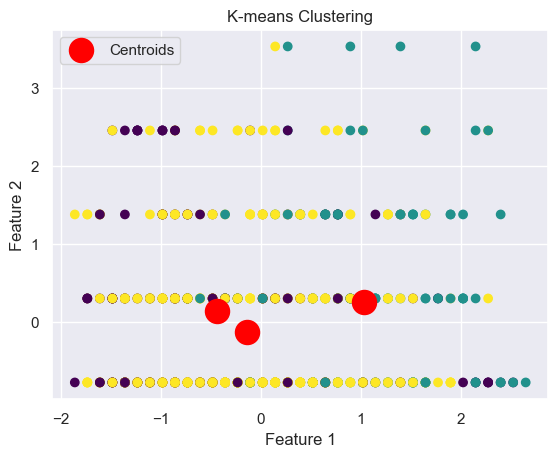

In [57]:
plt.scatter(df_customers_scaled[:, 0], df_customers_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
